# Análise Financeira com Python

### Objetivo:

Vamos dividir essa mentoria em 2 etapas:

Etapa 1 - Usar o Python para puxar dados da Web de cotação de qualquer ação e analisar o resultado de uma carteira

Etapa 2 - Puxar indicadores de empresas diferentes e fazer a comparação entre elas para escolhar "qual a melhor empresa"

### Disclamer Importante

Não sou analista, influencer, agente autônomo, sábio ou nada de finanças ou ações. Temos 1 objetivo aqui e apenas 1: aprender como usar o Python para fazer o que a gente quiser.

Então não se preocupe com "erros teóricos" ou ainda com o resultado de qualquer tipo de análise. O nosso objetivo aqui é treinar Python

### Parte 1 - Carteira de Investimentos

- Vamos pegar uma carteira teórica completa e calcular o rendimento dela ao longo de 2020 e comparar com os principais indicadores (CDI, IBOV, IPCA). No caso vamos usar o IBOV, mas o procedimento para os outros indicadores é semelhante

- Carteira: R$100.000, divididos da seguinte maneira em 01/01/2020:
- 30% Ações Brasileiras - Arquivo Carteira
- 10% SMAL11 - Arquivo Carteira
- 10% FII - Arquivo Carteira
- 50% Tesouro Selic

In [81]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#importando a carteira
carteira = pd.read_excel('CarteiraMentoria.xlsx')
display(carteira)


,Ativos,Valor Investido,Tipo,Qtde,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ITUB4,5000,Ação,134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BBDC4,5000,Ação,134.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PETR4,5000,Ação,162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QUAL3,5000,Ação,128.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MGLU3,5000,Ação,416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SMAL11,10000,ETF,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HSML11,5000,FII,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BCRI11,5000,FII,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Tesouro Selic,50000,Renda Fixa,4.775239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '')

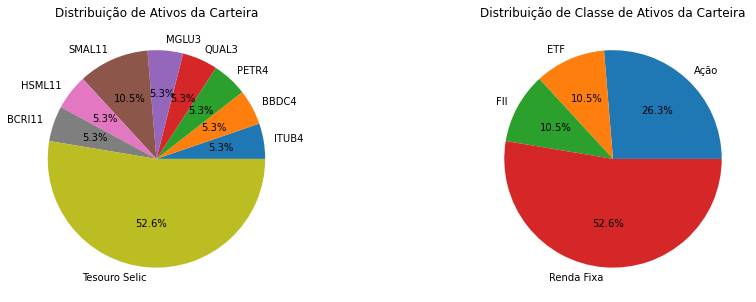

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
#vamos ver a distribuição da carteira por ativos
grafico1 = carteira.plot.pie(ax=ax1, labels=carteira['Ativos'], y='Valor Investido', legend=False, title='Distribuição de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico1.set_ylabel('')
#vamos ver agora a distribuição da carteira por classe de ativo
#print(carteira.groupby('Tipo').sum())
grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido', legend=False, title='Distribuição de Classe de Ativos da Carteira', figsize=(15, 5), autopct="%.1f%%")
grafico2.set_ylabel('')




#### Pegando as Cotações ao Longo de 2020

- IBOV

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-12-04,113864,112294,112294,113682,8892900,113682
2020-12-07,114531,112629,113751,113625,9633900,113625
2020-12-08,114381,112820,113590,113571,8810900,113571


<AxesSubplot:xlabel='Date'>

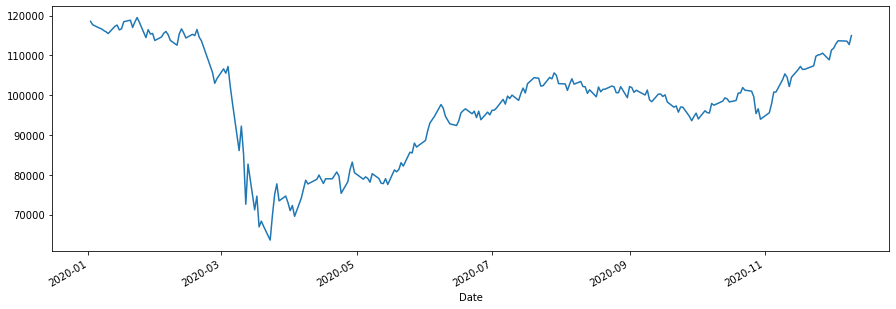

In [83]:
import pandas_datareader as web

# Indice : ^BVSP
# Ações brasileiras: TICKET.SA, PETR4.SA
# data_source = yahoo
# datas : '2020-12-10'

ibov_df = web.DataReader('^BVSP',data_source = 'yahoo', start = '2020-01-01', end = '2020-12-10')
display(ibov_df)
#ibov_df.info()
ibov_df['Adj Close'].plot(figsize = (15,5))


- Da nossa carteira

In [84]:
carteira_df = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
        if ativo != "VVAR3":
            carteira_df[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-12-10')['Adj Close']
carteira_df = carteira_df.ffill()
print(carteira_df.info())
display(carteira_df)

    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2020-01-02 to 2020-12-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB4   236 non-null    float64
 1   BBDC4   236 non-null    float64
 2   PETR4   236 non-null    float64
 3   QUAL3   236 non-null    float64
 4   MGLU3   236 non-null    float64
 5   SMAL11  236 non-null    float64
 6   HSML11  236 non-null    float64
 7   BCRI11  236 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB
None


,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11
Date,,,,,,,,
2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002
2020-01-03,35.406734,31.745750,24.747683,36.767052,11.922435,140.899994,123.500000,127.699997
2020-01-06,34.879807,31.178717,25.040266,38.274128,11.932190,139.100006,124.000000,126.699997
2020-01-07,34.070633,30.637056,24.942738,37.300045,11.898049,139.399994,124.699997,126.870003
2020-01-08,33.515484,30.163120,24.788321,36.583263,12.263844,138.199997,125.000000,124.570000
...,...,...,...,...,...,...,...,...
2020-12-04,29.134897,22.077274,22.376165,32.654663,23.618256,131.500000,94.120003,107.849998
2020-12-07,29.308205,22.222744,21.945385,32.294300,23.758009,132.070007,94.000000,107.330002
2020-12-08,29.231180,21.957479,21.669035,31.970892,24.905981,131.830002,94.330002,106.989998


- Do Tesouro Selic:

In [85]:
link = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link, sep=';', decimal=',')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')

tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo']=='Tesouro Selic', :]
display(tesouro_df)


,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
5,Tesouro Selic,01/03/2021,2020-01-22,0.01,0.02,10497.66,10496.51,10494.67
13,Tesouro Selic,01/03/2023,2020-01-22,0.01,0.02,10495.56,10492.31,10490.47
19,Tesouro Selic,01/03/2025,2020-01-22,0.02,0.03,10488.11,10482.78,10480.93
28,Tesouro Selic,01/03/2021,2020-02-28,0.01,0.02,10541.20,10540.15,10538.40
39,Tesouro Selic,01/03/2023,2020-02-28,0.02,0.03,10535.94,10532.80,10531.04
...,...,...,...,...,...,...,...,...
120067,Tesouro Selic,01/03/2025,2019-08-13,0.02,0.03,10254.20,10248.52,10246.14
120069,Tesouro Selic,01/03/2021,2019-08-13,0.00,0.01,10265.57,10263.99,10261.62
120080,Tesouro Selic,01/03/2023,2019-08-13,0.01,0.02,10261.94,10258.31,10255.93
120092,Tesouro Selic,01/03/2025,2019-06-24,0.02,0.03,10165.15,10159.37,10156.82


- Juntar o tesouro selic na nossa carteira

In [86]:
tesouro_df = tesouro_df.rename(columns={'Data Base': 'Date'})
carteira_df = carteira_df.merge(tesouro_df[['Date', 'PU Base Manha']], on='Date', how='left')
display(carteira_df)

,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,PU Base Manha
0,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10455.72
1,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10470.68
2,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10465.29
3,2020-01-03,35.406734,31.745750,24.747683,36.767052,11.922435,140.899994,123.500000,127.699997,10457.51
4,2020-01-03,35.406734,31.745750,24.747683,36.767052,11.922435,140.899994,123.500000,127.699997,10472.47
...,...,...,...,...,...,...,...,...,...,...
703,2020-12-09,29.404484,22.017378,21.896618,31.832291,23.937693,130.000000,93.849998,106.500000,10746.33
704,2020-12-09,29.404484,22.017378,21.896618,31.832291,23.937693,130.000000,93.849998,106.500000,10711.84
705,2020-12-10,30.376930,22.924429,22.611872,31.610527,23.358715,131.500000,92.989998,106.349998,10653.30
706,2020-12-10,30.376930,22.924429,22.611872,31.610527,23.358715,131.500000,92.989998,106.349998,10747.16


In [87]:
#Trocando coluna de valor por Tesouro Selic

carteira_df = carteira_df.rename(columns={'PU Base Manha': 'Tesouro Selic'})
carteira_df = carteira_df.ffill()
display(carteira_df)

,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic
0,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10455.72
1,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10470.68
2,2020-01-02,35.783092,31.731153,24.950865,36.022705,12.029736,139.500000,123.599998,126.190002,10465.29
3,2020-01-03,35.406734,31.745750,24.747683,36.767052,11.922435,140.899994,123.500000,127.699997,10457.51
4,2020-01-03,35.406734,31.745750,24.747683,36.767052,11.922435,140.899994,123.500000,127.699997,10472.47
...,...,...,...,...,...,...,...,...,...,...
703,2020-12-09,29.404484,22.017378,21.896618,31.832291,23.937693,130.000000,93.849998,106.500000,10746.33
704,2020-12-09,29.404484,22.017378,21.896618,31.832291,23.937693,130.000000,93.849998,106.500000,10711.84
705,2020-12-10,30.376930,22.924429,22.611872,31.610527,23.358715,131.500000,92.989998,106.349998,10653.30
706,2020-12-10,30.376930,22.924429,22.611872,31.610527,23.358715,131.500000,92.989998,106.349998,10747.16


- Calcular o valor investido

In [88]:
valor_investido = carteira_df.copy()

for ativo in carteira['Ativos']:
    #print(carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0])
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]

valor_investido = valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)
display(valor_investido)

,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic,Total
Date,,,,,,,,,,
2020-01-02,4794.934395,4251.974567,4042.040096,4610.906250,5004.369995,9904.500000,4943.999939,4921.410095,49928.562424,92402.697762
2020-01-02,4794.934395,4251.974567,4042.040096,4610.906250,5004.369995,9904.500000,4943.999939,4921.410095,50000.000000,92474.135338
2020-01-02,4794.934395,4251.974567,4042.040096,4610.906250,5004.369995,9904.500000,4943.999939,4921.410095,49974.261462,92448.396799
2020-01-03,4744.502419,4253.930557,4009.124577,4706.182617,4959.732880,10003.899567,4940.000000,4980.299881,49937.110102,92534.782599
2020-01-03,4744.502419,4253.930557,4009.124577,4706.182617,4959.732880,10003.899567,4940.000000,4980.299881,50008.547678,92606.220175
...,...,...,...,...,...,...,...,...,...,...
2020-12-09,3940.200829,2950.328632,3547.252098,4074.533203,9958.080139,9230.000000,3753.999939,4153.500000,51316.294644,92924.189484
2020-12-09,3940.200829,2950.328632,3547.252098,4074.533203,9958.080139,9230.000000,3753.999939,4153.500000,51151.596649,92759.491489
2020-12-10,4070.508652,3071.873478,3663.123219,4046.147461,9717.225464,9336.500000,3719.599915,4147.649940,50872.054155,92644.682283


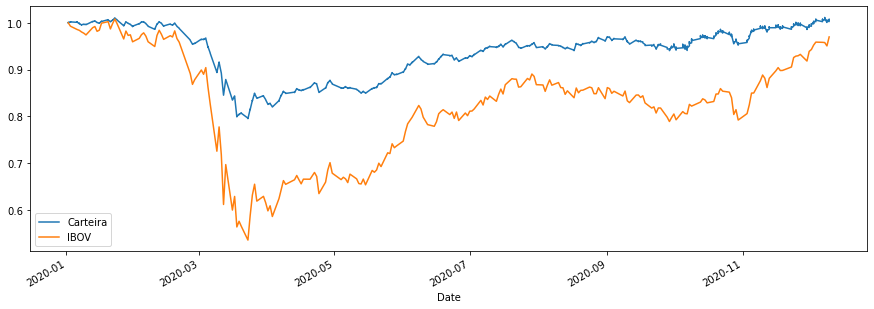

In [89]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
ibov_df_norm['Adj Close'].plot(label = 'IBOV')
plt.legend()

In [90]:
rentabilidade_carteira = valor_investido_norm ['Total'].iloc[-1] -1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc [-1]-1
print('Rentabilidade da Carteira foi de:{:.1%} '.format( rentabilidade_carteira))
print('Rentabilidade do Ibovespa foi de: {:.1%}'.format (rentabilidade_ibov))

Rentabilidade da Carteira foi de:0.6% 
Rentabilidade do Ibovespa foi de: -3.0%


### Parte 2 - Comparativo entre Ativos

Créditos: https://simply-python.com/2019/01/16/retrieving-stock-statistics-from-yahoo-finance-using-python/

In [91]:

tgt_website = r'https://sg.finance.yahoo.com/quote/PETR4.SA/key-statistics?p=PETR4.SA'
h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
import requests
r = requests.get(tgt_website, headers=h)
def get_key_stats(tgt_website, ticker):
    df_list = pd.read_html(tgt_website)
    result_df = df_list[0]
    for df in df_list[1:]:
        result_df = result_df.append(df)
    result_df = result_df.rename(columns={1: ticker})
    return result_df.set_index(0).T
# print(r.text)
df_petr4 = get_key_stats(r.text, 'PETR4')
display(df_petr4)

,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales (ttm),Price/book (mrq),Enterprise value/revenue,Enterprise value/EBITDA,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
PETR4,400.45B,668.75B,2.70,5.07,NaN,0.94,1.02,9.06,13.07,1.35,...,10.35,NaN,62.31B,4.78,324.12B,86.28,1.20,28.29,189.44B,122.42B


- Comparando as ações de:
    1. Magazine Luiza (MGLU3)
    2. Lojas Americanas (LAME4)
    3. Via Varejo (VVAR3)

In [92]:
import requests
h={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
acoes = ['MGLU3', 'LAME4', 'VIIA3']
estatiscas_empresas = pd.DataFrame()

for acao in acoes:
    link = f'https://sg.finance.yahoo.com/quote/{acao}.SA/key-statistics?p={acao}.SA'
    r = requests.get(link, headers=h)
    df = get_key_stats(r.text, acao)
    estatiscas_empresas = estatiscas_empresas.append(df)
display(estatiscas_empresas)

,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales (ttm),Price/book (mrq),Enterprise value/revenue,Enterprise value/EBITDA,Beta (5Y monthly),...,Diluted EPS (ttm),Quarterly earnings growth (yoy),Total cash (mrq),Total cash per share (mrq),Total debt (mrq),Total debt/equity (mrq),Current ratio (mrq),Book value per share (mrq),Operating cash flow (ttm),Levered free cash flow (ttm)
MGLU3,41.98B,45.35B,58.44,66.23,NaN,1.18,3.86,1.26,29.48,0.82,...,0.11,-30.30%,2.11B,0.32,5.48B,50.37,1.49,1.65,-1.78B,-2.19B
LAME4,9.91B,16.52B,15.94,9.37,NaN,0.38,1.52,0.64,4.37,1.24,...,0.31,91.30%,9.91B,5.26,16.52B,102.83,1.72,3.46,-2.23B,-3.12B
VIIA3,8.76B,21.29B,1.01k,NaN,NaN,0.28,1.54,0.66,48.27,2.12,...,0.0060,NaN,1.58B,0.99,15.88B,279.88,0.96,3.55,-89M,-1.06B


#### Price/sales (ttm)

<AxesSubplot:ylabel='Price/sales (ttm)'>

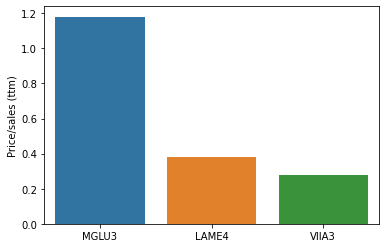

In [99]:
#astype(float) ---> transforma uma string em um numero inteiro

import seaborn as sns

sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Price/sales (ttm)'].astype(float))


#### Enterprise value / EBITDA

<AxesSubplot:ylabel='Enterprise value/EBITDA'>

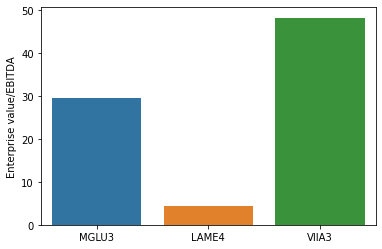

In [101]:
sns.barplot(x=estatiscas_empresas.index, y=estatiscas_empresas['Enterprise value/EBITDA'].astype(float)) # Faturamento antes dos impostos e amortização